In [1]:
from dolfin import *
import matplotlib.pyplot as plt

In [2]:
mesh = UnitIntervalMesh(10)
V = FunctionSpace(mesh, 'Lagrange', 1)
T = 0.5 # final time
num_steps = 5 # number of time steps
dt = T / num_steps # time step size

def boundary(x, on_boundary):
    return on_boundary

u_D = Constant(0.0)
bc = DirichletBC(V, u_D, boundary)

Calling FFC just-in-time (JIT) compiler, this may take some time.


In [3]:
 # The initial condition, u(t=0, x) = sin(pi * x)
 initial_condition =Expression("sin(3.141 * x[0])",degree=1)

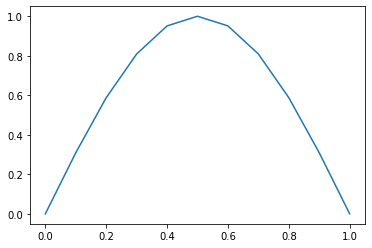

In [4]:
# Discretize the initial condition
u_old = interpolate(initial_condition,V)
plt.figure()
plot(u_old, label="t=0.0")

In [5]:
# The forcing on the rhs of the PDE
f = Constant(0.0)

# Create the Finite Element Problem
u = TrialFunction(V)
v = TestFunction(V)

In [37]:
#F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_old + dt*f)*v*dx
#a, L = lhs(F), rhs(F)

In [6]:
a=u*v*dx + dt*inner(nabla_grad(u), nabla_grad(v))*dx 
L=(u_old + dt*f)*v*dx

In [7]:
u = Function(V)
t = 0

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


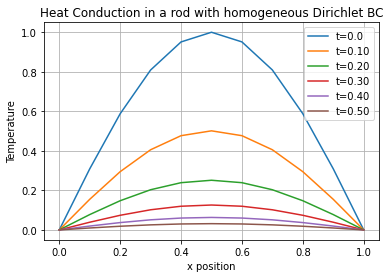

In [8]:
plot(u_old, label="t=0.0")
for n in range(num_steps):
    # Update current time
    t += dt
   
    # Compute solution
    solve(a == L, u, bc)
    # Plot solution
   
    plot(u,label=f"t={t:1.2f}")
    # Compute error at vertices
    u_e = interpolate(u_D, V)
    #error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    #print('t = %.2f: error = %.3g' % (t, error))
    # Update previous solution
    u_old.assign(u)
    u.rename("u", "u") #see the QA reported below.

# Hold plot
plt.legend()
plt.title("Heat Conduction in a rod with homogeneous Dirichlet BC")
plt.xlabel("x position")
plt.ylabel("Temperature")
plt.grid()
plt.show()